<a href="https://colab.research.google.com/github/Sabeerawa05/Datasets-Practices/blob/main/Poverty_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
from imutils import paths
import random

In [ ]:
data_path = '/content/drive/MyDrive/archive'

In [ ]:
imagePaths = list(paths.list_images(data_path))

In [ ]:
imagePaths[:5]

['/content/drive/MyDrive/archive/ethiopia_archive/images/9.403781649091993_35.659306619405974_9.38880972769_35.6143908552.png',
 '/content/drive/MyDrive/archive/ethiopia_archive/images/9.375267229741992_42.07709693529801_9.36029530834_42.0920688567.png',
 '/content/drive/MyDrive/archive/ethiopia_archive/images/9.337776041960002_42.09570338780199_9.337776041960002_42.080731466399996.png',
 '/content/drive/MyDrive/archive/ethiopia_archive/images/9.330351465536015_42.107040778102_9.36029530834_42.0920688567.png',
 '/content/drive/MyDrive/archive/ethiopia_archive/images/9.388046588163984_35.56019346379801_9.35810274536_35.5751653852.png']

In [ ]:
len(imagePaths)

56205

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.cvtColor(cv2.imread(imagePaths[0]), cv2.COLOR_BGR2RGB)

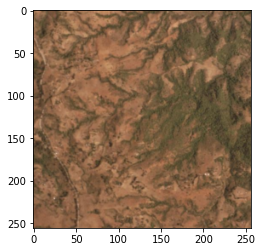

In [ ]:
plt.imshow(img)

In [ ]:
categories = []

mali = 0
etho = 0
malawi = 0
nig = 0
for cat in imagePaths:
  category = cat.split('/')[-3]

  if category == 'Mali_archive':
    mali = mali+1
  elif category == 'ethiopia_archive':
    etho = etho+1
  elif category == 'malawi_archive':
    malawi = malawi+1
  elif category == 'nigeria_archive':
    nig = nig +1

print('Mali image count {}'.format(mali))
print('Etho image count {}'.format(etho))
print('Malawi image count {}'.format(malawi))
print('NIg image count {}'.format(nig))

Mali image count 14759
Etho image count 8590
Malawi image count 12700
NIg image count 11551


In [ ]:
import random
random.seed(15)
random.shuffle(imagePaths)

In [ ]:
imagePaths[:5]

['/content/drive/MyDrive/archive/nigeria_archive/images/6.291734915754023_5.611715878151991_6.336650679959999_5.596743956749999.png',
 '/content/drive/MyDrive/archive/ethiopia_archive/images/ethiopia_Images/7.149357806198008_39.865286818305975_7.1643297276_39.8203710541.png',
 '/content/drive/MyDrive/archive/ethiopia_archive/images/ethiopia_Images/3.410784802784024_39.48605008329602_3.45570056699_39.5159939261.png',
 '/content/drive/MyDrive/archive/nigeria_archive/images/4.996618551718008_7.919682570786016_5.01159047312_7.94962641359.png',
 '/content/drive/MyDrive/archive/ethiopia_archive/images/ethiopia_Images/10.923694298094023_37.1784774038_10.9686100623_37.1784774038.png']

In [ ]:
imagePaths[0].split(os.path.sep)[-3]

'nigeria_archive'

In [ ]:
def load_data(imagePaths, verbose=1000):
		# initialize the list of features and labels
		data = []
		labels = []
		# loop over the input images
		for (i, imagePath) in enumerate(imagePaths):
			# load the image and extract the class label assuming
			# that our path has the following format:
			# /path/to/dataset/{class}/{image}.jpg
			image = cv2.imread(imagePath)
			label = imagePath.split(os.path.sep)[-3]

      # treat our processed image as a "feature vector"
			# by updating the data list followed by the labels
			data.append(image)
			labels.append(label)

      # show an update every `verbose` images
			if (i + 1) % verbose == 0:
				print("[INFO] processed {}/{}".format(i + 1,
                                          len(imagePaths)))

    # return a tuple of the data and labels
		return (np.array(data), np.array(labels))


In [ ]:
(data, labels) = load_data(imagePaths, verbose=1000)

[INFO] processed 1000/56205
[INFO] processed 2000/56205
[INFO] processed 3000/56205
[INFO] processed 4000/56205
[INFO] processed 5000/56205
[INFO] processed 6000/56205
[INFO] processed 7000/56205
[INFO] processed 8000/56205
[INFO] processed 9000/56205
[INFO] processed 10000/56205
[INFO] processed 11000/56205
[INFO] processed 12000/56205
[INFO] processed 13000/56205
[INFO] processed 14000/56205
[INFO] processed 15000/56205
[INFO] processed 16000/56205
[INFO] processed 17000/56205


In [ ]:
##from google.colab import drive
##drive.mount('/content/drive')

# New section

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.utils import to_categorical

In [ ]:
classNames = [pt.split(os.path.sep)[-3] for pt in imagePaths]
classNames = [str(x) in np.unique(classNames)]

In [ ]:
len(classNames)

In [ ]:
data = data.astype('float')

In [ ]:
'''bs = 32

for i in range(0, data.shape[0], bs):
  data = data[i:i+bs]'''

In [ ]:
data /=255.0

In [ ]:
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
labels = to_categorical(labels, len(classNames))

In [ ]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
                                                  test_size=0.10, random_state=42)

In [ ]:
(trainX, valX, trainY, valY) = train_test_split(trainX, trainY,
                                                  test_size=0.15, random_state=42)

In [ ]:
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# off
print("[INFO] preparing model...")
baseModel = ResNet50(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(256, 256, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(4096, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(classNames), activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
for layer in baseModel.layers:
	layer.trainable = False



In [ ]:
# compile the model
epochs = 200
lr = 1e-4
opt = Adam(lr=lr, decay=lr / epochs)
model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])

In [ ]:
es = [EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, save_best_only=True)]

In [ ]:
# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
              batch_size=32, epochs=epochs, callbacks=es, verbose=1)

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(H.history["loss"], label="train_loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.plot(H.history["accuracy"], label="train_acc")
plt.plot(H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Satelitte Images")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1), target_names=classNames))